# Decision Tree

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sdss = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')

In [3]:
c = 300000
sdss['velocity'] = sdss['redshift']*c

sdss['super_vel'] = ""

sdss['super_vel'][sdss['velocity'] >= np.mean(sdss['velocity'])] = 1
sdss['super_vel'][sdss['velocity'] <  np.mean(sdss['velocity'])] = 0

sdss['disc_redshift'] = pd.cut(sdss['redshift'], bins = range(-1,9,1), labels =["-1","0","1","2","3","4","5","6","7"])
sdss['disc_vel'] = pd.cut(sdss['velocity'], bins = [-10000,0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000, 2200000], labels = ["-10000","0","10000","20000","30000","40000","50000","60000","70000","80000","90000","100000"])

C:\Users\josep\AppData\Local\Temp\ipykernel_11028\2651909485.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdss['super_vel'][sdss['velocity'] >= np.mean(sdss['velocity'])] = 1
C:\Users\josep\AppData\Local\Temp\ipykernel_11028\2651909485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdss['super_vel'][sdss['velocity'] <  np.mean(sdss['velocity'])] = 0


In [4]:
sdss.drop(['objid','run','rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)

In [5]:
sdss.head()

,ra,dec,u,g,r,i,z,class,redshift,velocity,super_vel,disc_redshift,disc_vel
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,34.396080,0,0,0
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,-27.827664,0,-1,-10000
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,49.374210,0,0,0
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155,17446.548000,0,0,10000
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210,21663.147000,0,0,20000


In [6]:
from sklearn.model_selection import train_test_split

Let's use only the 1000 first entries of the data frame for the sake of visualization

In [7]:
sdss_dtree = sdss[:1000]

X = sdss_dtree.drop('class',axis=1)
y = sdss_dtree['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn import tree

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

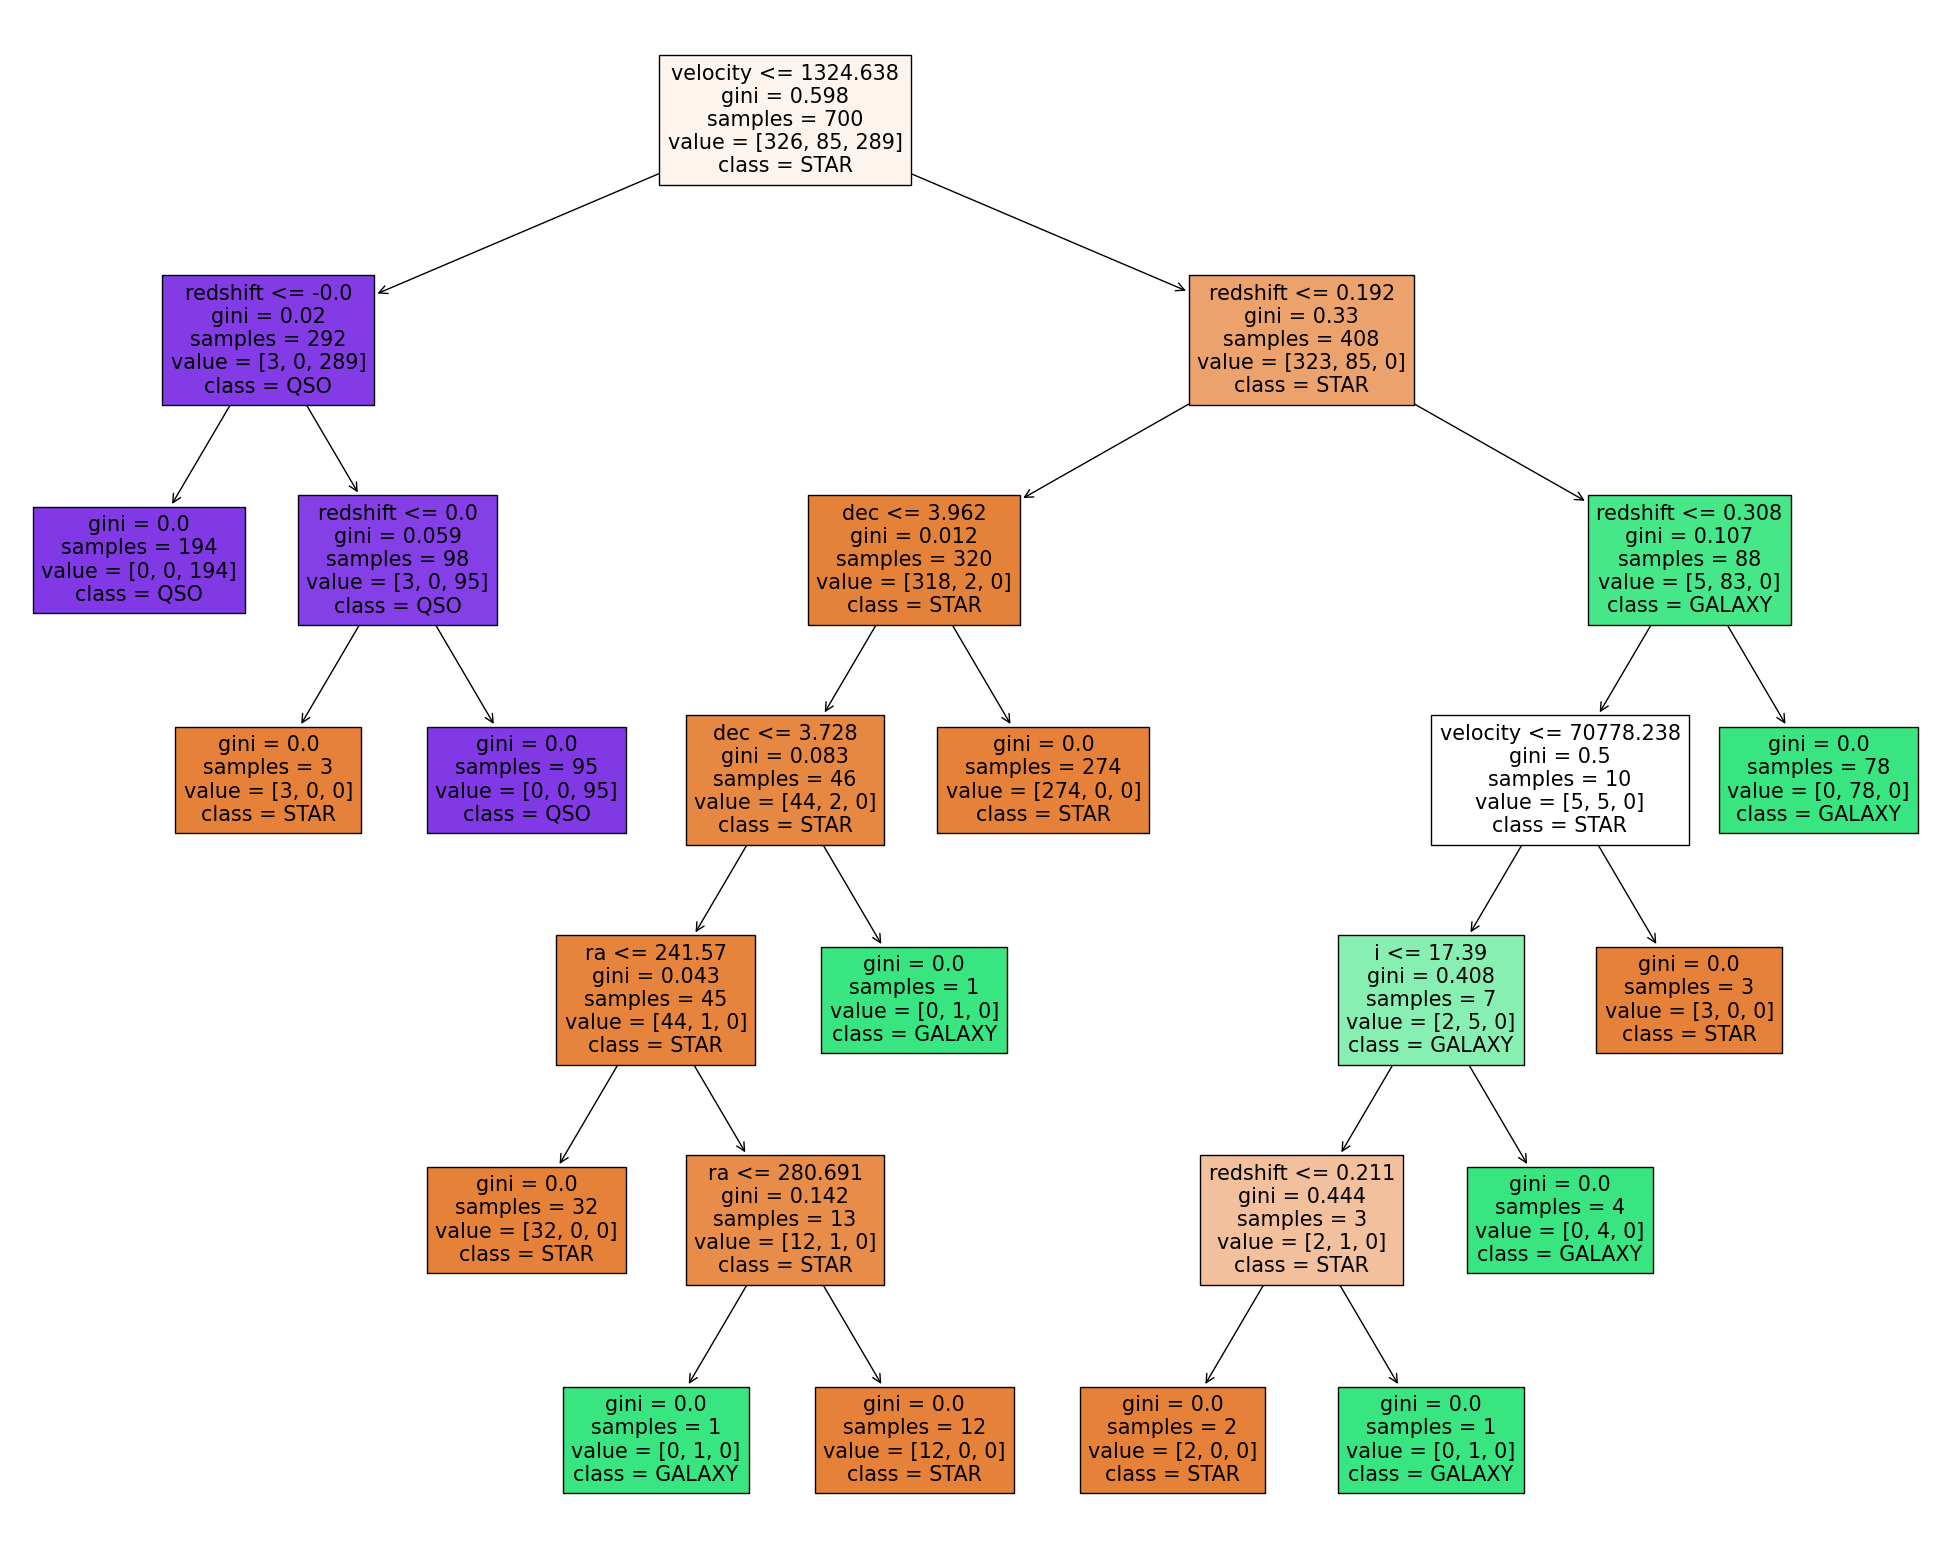

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=sdss_dtree.columns.drop('class'),
                   class_names=y.unique(),
                   filled=True)

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[142   1   0]
 [  4  21   0]
 [  0   0 132]]


              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98       143
         QSO       0.95      0.84      0.89        25
        STAR       1.00      1.00      1.00       132

    accuracy                           0.98       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.98      0.98      0.98       300



The accuracy of the f1-score is 98%

# Random Forest

Let's see if the prediction improves with using a random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators = 10)

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[142   1   0]
 [  4  21   0]
 [  0   0 132]]


              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98       143
         QSO       0.95      0.84      0.89        25
        STAR       1.00      1.00      1.00       132

    accuracy                           0.98       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.98      0.98      0.98       300



The random forest has been able to predict correctly 2 quasars more than the decision tree.

The f1-score has increased from 0.98 to 0.99

Let's try increasing the number of estimators

In [21]:
rfc = RandomForestClassifier(n_estimators = 600)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[142   1   0]
 [  2  23   0]
 [  0   0 132]]


              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       143
         QSO       0.96      0.92      0.94        25
        STAR       1.00      1.00      1.00       132

    accuracy                           0.99       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300



The score does not increase. We conclude that with 10 estimators is enough to get the best predictions.

## Decision Tree and Random Forest with all the Data Set

Let's use all the data set but without visualizing the rules of the decision tree.

In [25]:
X = sdss.drop('class',axis=1)
y = sdss['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predictions = dtree.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15203   173    27]
 [  173  3032     1]
 [    9     0 11382]]


              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     15403
         QSO       0.95      0.95      0.95      3206
        STAR       1.00      1.00      1.00     11391

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



In [29]:
rfc = RandomForestClassifier(n_estimators = 10)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[15328    54    21]
 [  219  2985     2]
 [    7     0 11384]]


              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99     15403
         QSO       0.98      0.93      0.96      3206
        STAR       1.00      1.00      1.00     11391

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000

